### This is the mini project of Bigmart Outlet Sales prediction 
##### the methods that i have followed are
* 1)The Business Problem Exploring 
* 2)The Dataset 
* 3)Exploratory Data Analysis (eda) - Outliers
* 4)Exploratory Data Analysis (eda) - Graphs
* 5)Converting Categorical To Numerical
* 6)Seperating Training And Test Data
* 7)Running The Models
* 8)Hyper Parameter Tuning XGB And GBR
* 9)Standard Scaling 06m Robust Scaling
* 10)Final Predictions On The Test Dataset
* 11)Saving The Final Model

BY Saumik Sarkar

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline     
#magic function in IPython  In[101]
import matplotlib.pyplot as plt     # is a collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns

In [2]:
df_train= pd.read_csv('../BigmartData/Train.csv')
df_test= pd.read_csv('../BigmartData/Test.csv')

In [3]:
df_train.head()  # displays the first five rows of the dataframe by default

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.shape  # a tuple of array dimensions that tells the number of rows and columns of a given DataFrame

(8523, 12)

In [6]:
df_train.isnull().sum()  #seeing the number of null values in the train data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
##checking for null values in test data
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_train.info()   #seeing the detailed info of the dataset and its types of target variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()  # to generate descriptive statistics that summarize the central tendency, dispersion and
                     # shape of a dataset's distribution, excluding NaN values.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#####  Item_Weight is numerical column so i filled it with Mean of the Item weights

In [10]:
df_train['Item_Weight'].describe()  #seeing all the central tendenies of the dataset

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)  #replacing null values with mean values
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [12]:
df_train.isnull().sum()  #no null values in item weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

#### Filling outlet size with Mode Imputation as it is a categorical column 

In [14]:
df_train['Outlet_Size']  #it is a categorical value 

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [15]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [17]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

## pandas treats the mode as something special since they can be unimodal , bimodal or multimodal distributions they 
## had to make sure that 1 value could be returned   "Always return series even if only one value is returned"

In [18]:
df_train.isnull().sum()  #no null value :)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Dimesnsionality reduction of item identifier and outlet identifier

In [20]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [21]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.857645,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


## EDA done using Klib library

In [23]:
#pip install klib

In [24]:
import klib

GridSpec(6, 5)

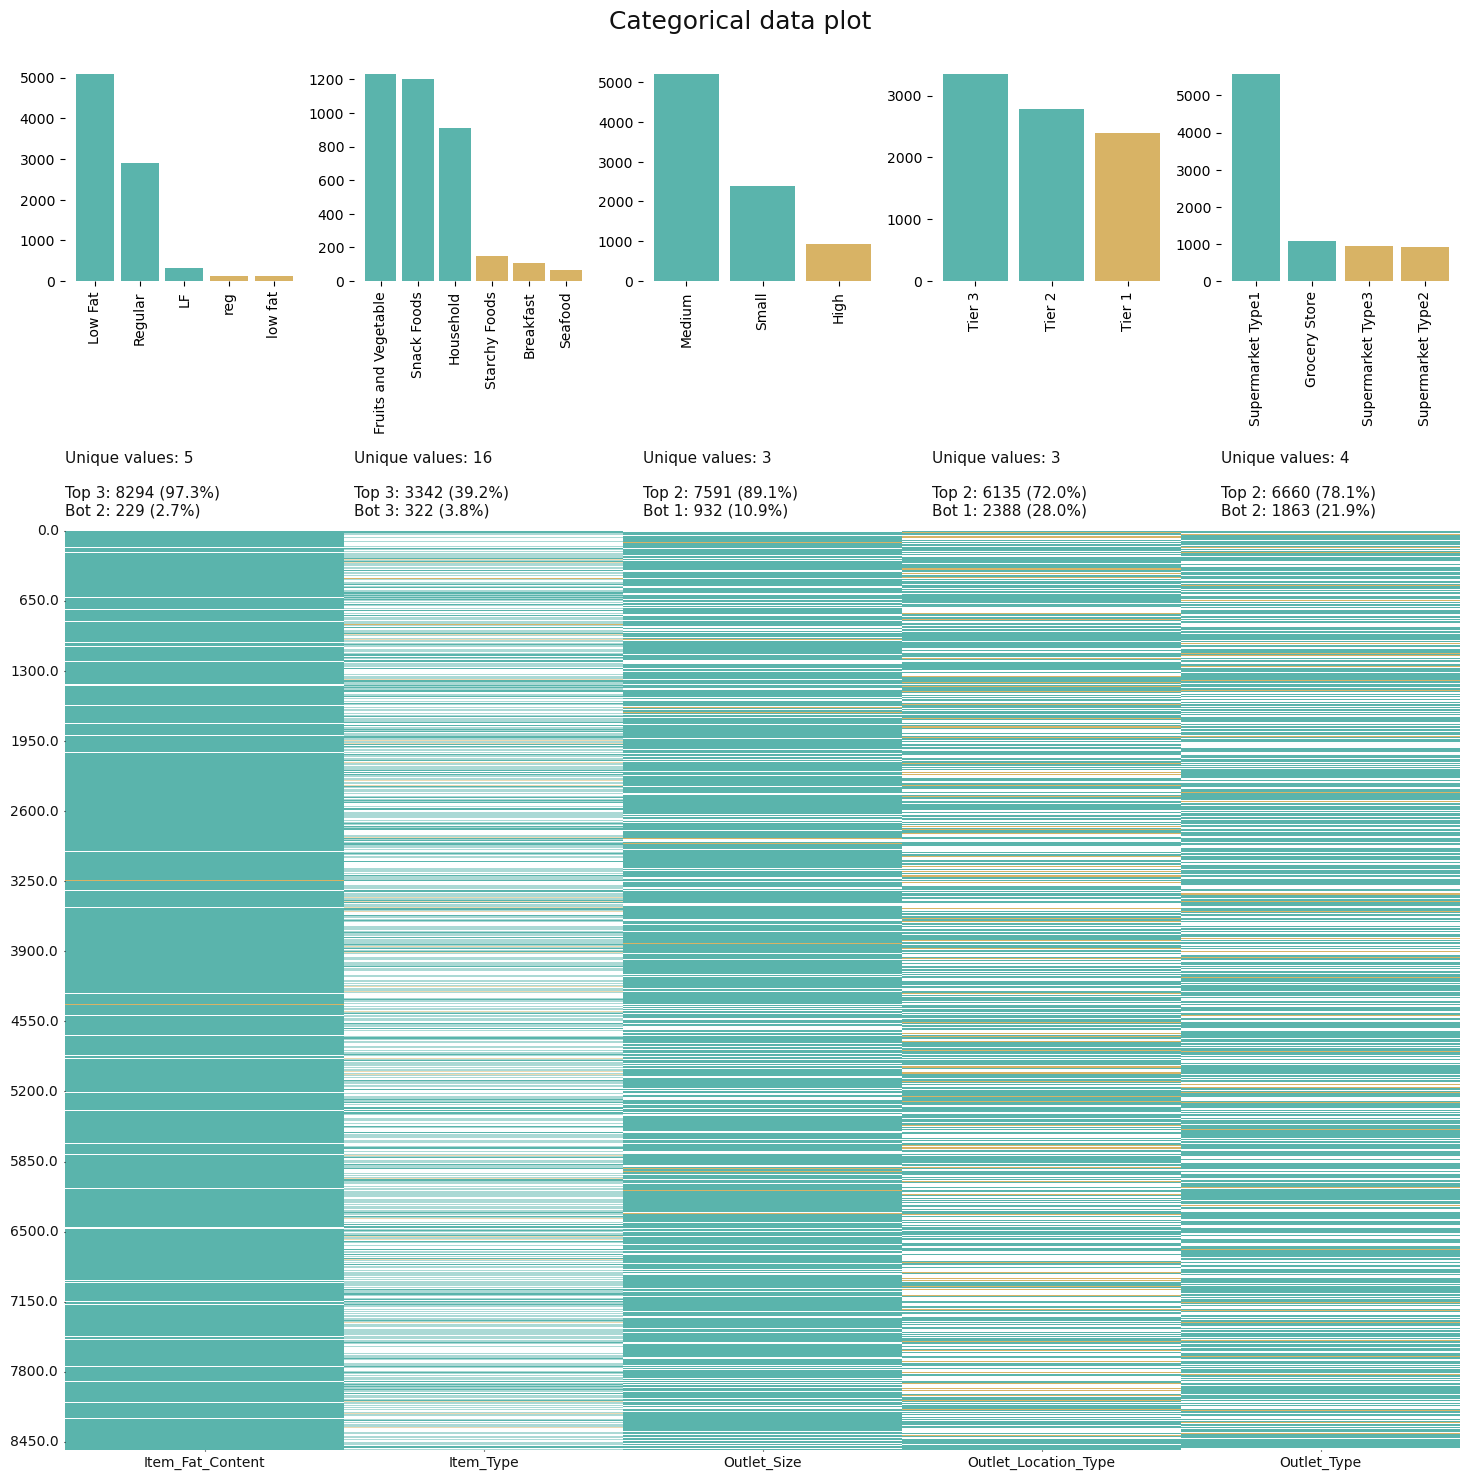

In [25]:
# klib.describe - functions for visualizing datasets
## this will return all the frequency of categorical columns or features
klib.cat_plot(df_train) 

In [26]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

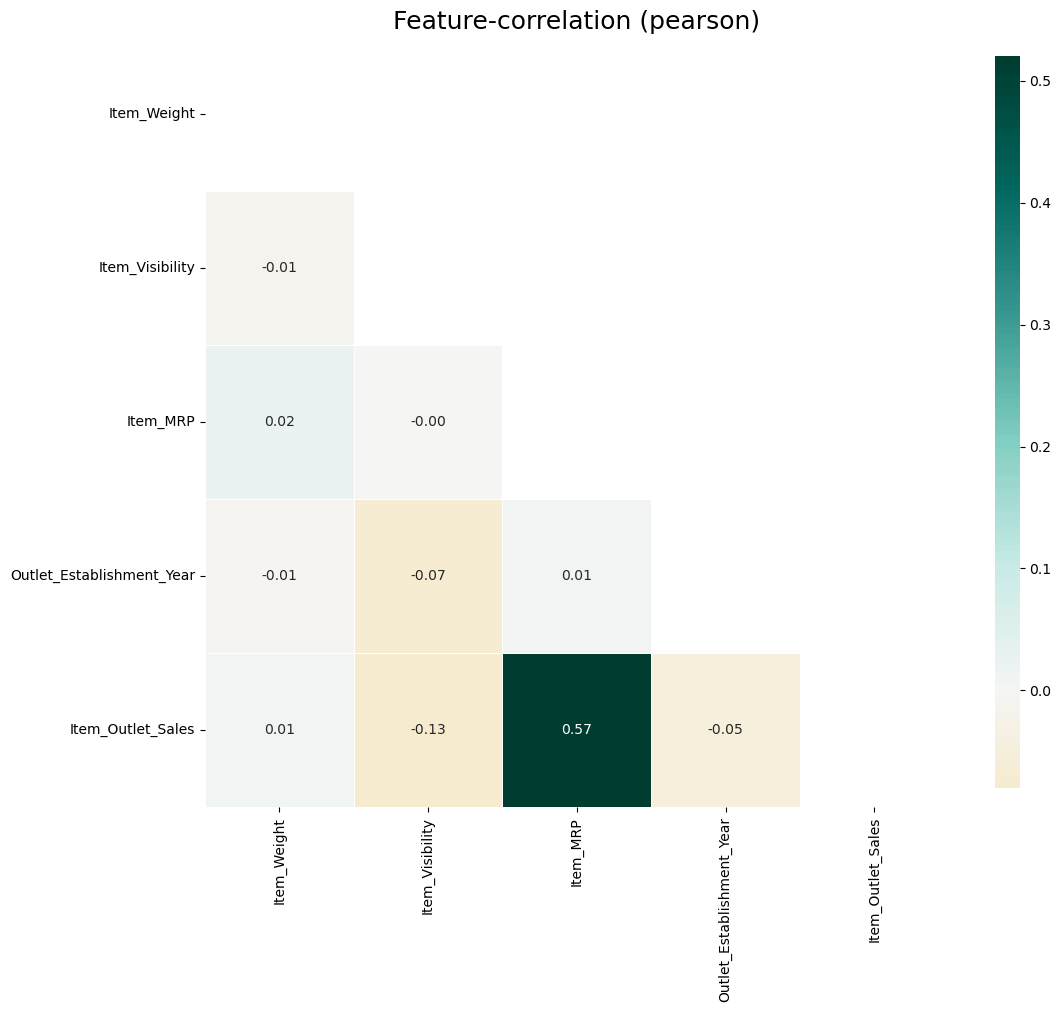

In [27]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

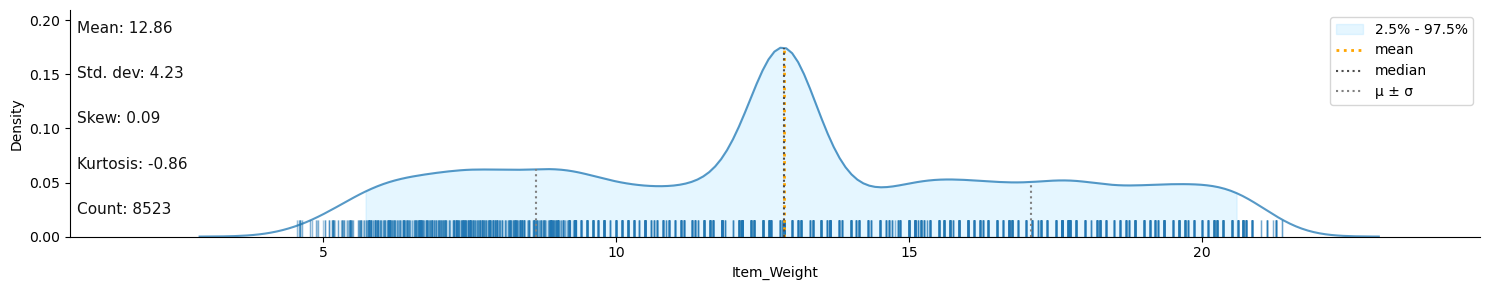

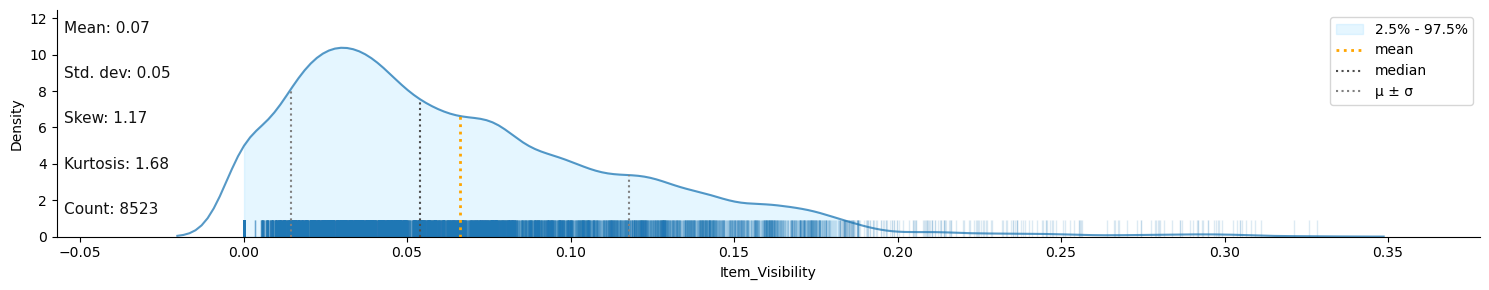

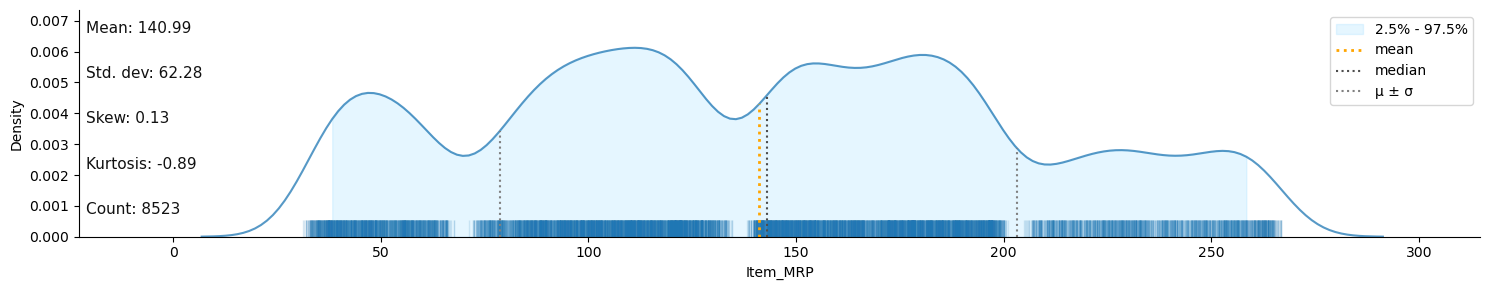

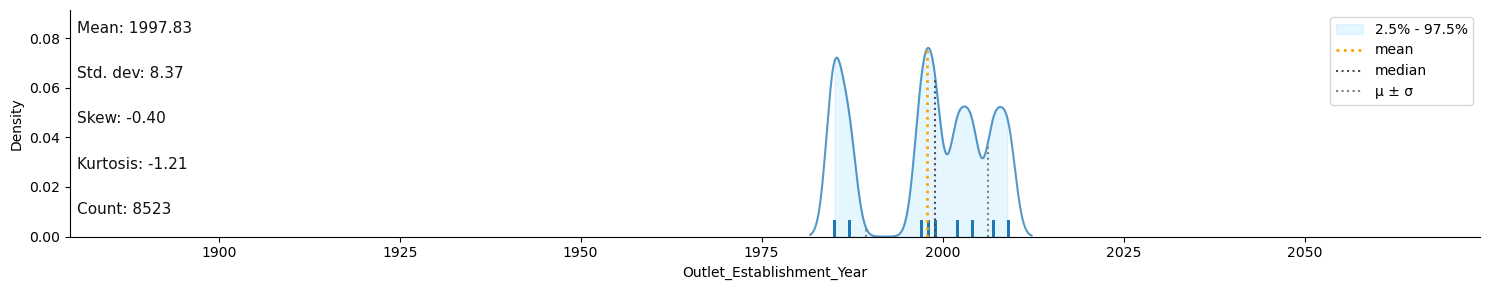

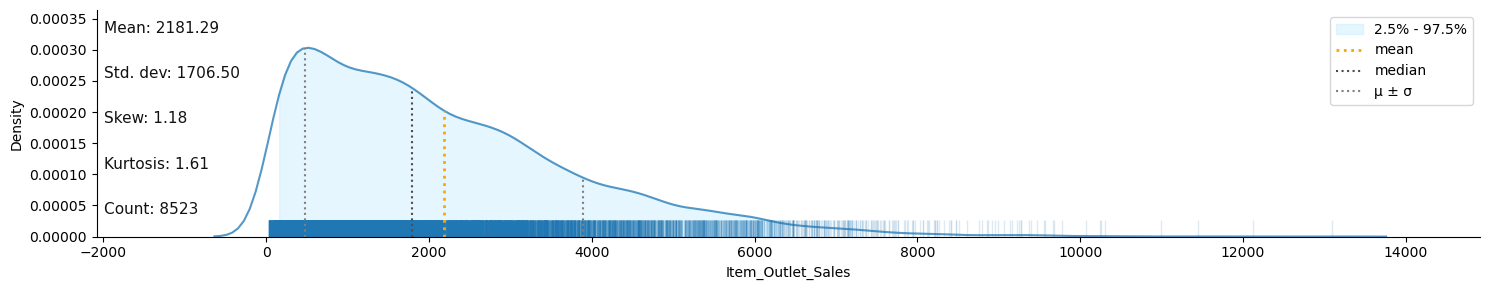

In [28]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature

In [29]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


## Data cleaning Klib 

In [30]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [31]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [33]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [34]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


## Preprocessing Task before Model Building

## 1) Label encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [37]:
df_train.head(5)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200


## 2) Splitting our data into train and test files

In [38]:
X=df_train.drop('item_outlet_sales',axis=1)

In [39]:
Y=df_train['item_outlet_sales']

In [40]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#### Standarization for fitting into the model values between 0-1

In [41]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226130,0.644810,0.051598,4.209990,62.275051,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [42]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [43]:
X_train_std= sc.fit_transform(X_train)  # learning how the data is in X train and then transforming

In [44]:
X_test_std= sc.transform(X_test)

In [45]:
X_train_std

array([[-0.80021083,  0.97369917, -0.60070306, ..., -0.28419801,
        -1.38348228, -0.25948864],
       [ 1.21131737, -0.57161762, -0.36215852, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.11665731,  0.97369917,  0.19493282, ...,  1.38332526,
        -1.38348228, -0.25948864],
       ...,
       [ 1.11665731, -0.57161762, -0.9169315 , ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.76744585,  2.51901595, -0.22818683, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.82084434, -2.1169344 , -0.95485941, ...,  1.38332526,
        -1.38348228, -0.25948864]])

In [46]:
X_test_std

array([[ 0.33571102, -0.57161762, -0.77388703, ..., -1.95172128,
         1.08416512, -0.25948864],
       [-1.17175197, -0.57161762,  0.09797782, ...,  1.38332526,
        -1.38348228, -0.25948864],
       [ 0.38304105,  0.97369917, -0.48194222, ..., -0.28419801,
        -1.38348228, -0.25948864],
       ...,
       [ 0.38304105,  0.97369917, -0.48385675, ..., -1.95172128,
         1.08416512, -0.25948864],
       [-0.72921568,  0.97369917,  1.46010303, ..., -0.28419801,
         1.08416512,  0.9908248 ],
       [-1.17766814, -0.57161762, -0.21387996, ..., -0.28419801,
        -0.14965858, -0.25948864]])

In [47]:
Y_train

549     2386.227295
7757    3103.959717
764     1125.202026
6867     284.296600
2716    4224.500977
           ...     
5734     280.967590
5191    1301.639038
5390    6145.333984
860     1649.852417
7270     965.409973
Name: item_outlet_sales, Length: 6818, dtype: float32

In [48]:
Y_test

7503    1743.064453
2957     356.868805
7031     377.508606
1084    5778.478027
856     2356.931885
           ...     
7205    3004.089600
3257     890.840393
6346     629.181030
6318     253.003998
6339     976.728577
Name: item_outlet_sales, Length: 1705, dtype: float32

In [49]:
import joblib 

In [50]:
joblib.dump(sc,'../BigmartData/sc.sav')

['../BigmartData/sc.sav']

# Model building 

In [51]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
7503,14.300000,1,0.026300,5,79.430199,1987,0,2,1
2957,7.930000,1,0.071136,8,42.708599,1997,2,0,1
7031,14.500000,2,0.041313,3,42.045399,1999,1,0,1
1084,12.857645,2,0.044767,14,173.705399,1985,1,2,3
856,10.195000,2,0.012456,10,197.511002,2004,2,1,1


In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [54]:
models={"Linear Regression" : LinearRegression(),
       "XGBRegressor" : XGBRegressor(),
       "Random Forest Regressor" : RandomForestRegressor()}
## checking scores for each model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    mean_absolute_errors={}
    mean_square_error={}
    for name, model in models.items():
        ##fitting every model and finding score
        model.fit(X_train,y_train)
        Y_pred=model.predict(X_test)
        model_scores[name]=model.score(X_test,y_test);
        mean_absolute_errors[name]=mean_absolute_error(y_test,Y_pred)
        mean_square_error[name]=mean_squared_error(y_test,Y_pred)
    return model_scores,mean_absolute_errors,mean_square_error

In [55]:
fit_and_score(models=models,X_train=X_train_std,X_test=X_test_std,y_train=Y_train,y_test=Y_test)

({'Linear Regression': 0.5242478611984475,
  'XGBRegressor': 0.5417192447044168,
  'Random Forest Regressor': 0.5637245271165133},
 {'Linear Regression': 856.4053568319727,
  'XGBRegressor': 776.80804,
  'Random Forest Regressor': 761.688310677917},
 {'Linear Regression': 1293080.0762732523,
  'XGBRegressor': 1245593.5,
  'Random Forest Regressor': 1185783.6796560234})

### From the above it is clear that the Random forest Regressor model is working best in the model but needs some hyperparameter tuning for better scores

## Hyper parameter tuning

#### Tuning with RandomizedSearchCV

In [56]:

from sklearn.model_selection import RandomizedSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=[0.1,0.5,1]
# define random search
grid = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,max_features=max_features
           ,min_samples_leaf=min_samples_leaf)


random_search_forest = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

random_search_forest.fit(X_train_std, Y_train)

# summarizing results
print(f"Best: {random_search_forest.best_score_:.3f} using {random_search_forest.best_params_}")
means = random_search_forest.cv_results_['mean_test_score']
stds = random_search_forest.cv_results_['std_test_score']
params = random_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best: 0.275 using {'n_estimators': 100, 'min_samples_split': 1, 'min_samples_leaf': 0.1, 'max_features': 'log2', 'max_depth': 20}
-0.003 (0.000) with: {'n_estimators': 10, 'min_samples_split': 1, 'min_samples_leaf': 0.3387755102040817, 'max_features': 'auto', 'max_depth': 6}
-0.003 (0.000) with: {'n_estimators': 1000, 'min_samples_split': 0.5, 'min_samples_leaf': 0.6510204081632653, 'max_features': 'auto', 'max_depth': 5}
-0.003 (0.000) with: {'n_estimators': 1000, 'min_samples_split': 1, 'min_samples_leaf': 0.41224489795918373, 'max_features': 'auto', 'max_depth': 1}
-0.003 (0.000) with: {'n_estimators': 10, 'min_samples_split': 0.5, 'min_samples_leaf': 0.43061224489795924, 'max_features': 'sqrt', 'max_depth': 28}
0.275 (0.009) with: {'n_estimators': 100, 'min_samples_split': 1, 'min_samples_leaf': 0.1, 'max_features': 'log2', 'max_depth': 20}
0.249 (0.005) with: {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_l

In [57]:
random_search_forest.best_params_

{'n_estimators': 100,
 'min_samples_split': 1,
 'min_samples_leaf': 0.1,
 'max_features': 'log2',
 'max_depth': 20}

In [58]:
random_search_forest.best_score_

0.2748081262557973

### Tuning with Grid Search CV

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=[0.1,0.5,1]
# define grid search
grid = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)


grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 270 candidates, totalling 540 fits
Best: 0.586 using {'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 1000}
0.239 (0.008) with: {'max_depth': 1, 'min_samples_split': 0.1, 'n_estimators': 10}
0.251 (0.004) with: {'max_depth': 1, 'min_samples_split': 0.1, 'n_estimators': 100}
0.250 (0.005) with: {'max_depth': 1, 'min_samples_split': 0.1, 'n_estimators': 1000}
0.245 (0.000) with: {'max_depth': 1, 'min_samples_split': 0.5, 'n_estimators': 10}
0.251 (0.003) with: {'max_depth': 1, 'min_samples_split': 0.5, 'n_estimators': 100}
0.250 (0.004) with: {'max_depth': 1, 'min_samples_split': 0.5, 'n_estimators': 1000}
0.247 (0.003) with: {'max_depth': 1, 'min_samples_split': 1, 'n_estimators': 10}
0.249 (0.003) with: {'max_depth': 1, 'min_samples_split': 1, 'n_estimators': 100}
0.249 (0.004) with: {'max_depth': 1, 'min_samples_split': 1, 'n_estimators': 1000}
0.457 (0.007) with: {'max_depth': 2, 'min_samples_split': 0.1, 'n_estimators': 10}
0.462 (0.005) with: {'m

In [60]:
grid_search_forest.best_params_

{'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 1000}

In [61]:
grid_search_forest.best_score_

0.5862602893469426

In [62]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [63]:
r2_score(Y_test,Y_pred_rf_grid)

0.6166673784747714

### Feature Engineering 

In [65]:
## Checking which feature is important for predictions
grid_search_forest.best_params_

{'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 1000}

In [69]:
clf=RandomForestRegressor(max_depth= 5, min_samples_split=1, n_estimators= 1000)
clf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_split=1, n_estimators=1000)

In [77]:

clf.feature_importances_

array([2.90858662e-04, 3.14300977e-04, 1.83626982e-03, 4.82978955e-04,
       5.53225591e-01, 6.22399173e-02, 3.57931714e-05, 2.24964777e-05,
       3.81551794e-01])

## Save the model

In [79]:
import pickle

In [80]:
pickle.dump(grid_search_forest,open('Big_data_model.pkl','wb'))

In [ ]:
model=pickle

In [ ]:
model.predict(X_test_std)